<a href="https://colab.research.google.com/github/Sharan-Babu/Gemini/blob/main/Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini 👥 
An eclectic news search engine that helps with deduplication of news articles and enriches your reading experience. Enables readers to dig deep into a certain opinion or explore multiple facets of the news at hand.

In [ ]:
# Necessary installs -- all are open source libraries
!pip install -U PyTigerGraph keybert sentence-transformers newscatcherapi

     |████████████████████████████████| 79 kB 5.0 MB/s 
     |████████████████████████████████| 229 kB 19.5 MB/s 
     |████████████████████████████████| 4.0 MB 31.2 MB/s 
     |████████████████████████████████| 1.2 MB 38.4 MB/s 
     |████████████████████████████████| 77 kB 5.7 MB/s 
     |████████████████████████████████| 51 kB 6.5 MB/s 
     |████████████████████████████████| 596 kB 56.3 MB/s 
     |████████████████████████████████| 895 kB 59.1 MB/s 
     |████████████████████████████████| 6.6 MB 48.9 MB/s 
     |████████████████████████████████| 288 kB 56.3 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=813d0482b441ab2cf028fa8c571785ef587acf6b7925253b6e501ed13ca38dc8
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sh

# Using NewsCatcher API to collect news dataset

Use double quotes (") for the exact match.

If you write *q=Sharan Babu* it will be treated as *q=Sharan AND Babu*

In [ ]:
# SET YOUR SEARCH TERM HERE !!!
search_term = "Russia vs Ukraine war"

In [ ]:
# Fetch relevant news from our API
from newscatcherapi import NewsCatcherApiClient

API_KEY = '4-MzQydFTLmS_18AZEQYpEVUuUfw4UrmBXI22hayRpM'     # Replace with your API key (Website Link: https://app.newscatcherapi.com/auth/register)

newscatcherapi = NewsCatcherApiClient(x_api_key=API_KEY)

news_articles = newscatcherapi.get_search(q=search_term, lang='en', page_size=100)

In [ ]:
# View collected news articles
news_articles

{'articles': [{'_id': '59671cd36eb3fd8c1a67853e55773599',
   '_score': 20.879906,
   'author': 'marca.com',
   'authors': ['marca.com'],
   'clean_url': 'marca.com',
   'country': 'ES',
   'excerpt': "Canadian sniper 'Wali' has become famous after joining up with the Ukrainian army to fight alongside their forces following Russia's invasion of their neighbouring country. Wali, w",
   'is_opinion': False,
   'language': 'en',
   'link': 'https://www.marca.com/en/lifestyle/world-news/2022/04/10/6252f55646163ffd908b45b3.html',
   'media': 'https://phantom-marca.unidadeditorial.es/fa8238944381a24355dcc00af9ed3295/resize/1200/f/jpg/assets/multimedia/imagenes/2022/04/10/16495942040846.jpg',
   'published_date': '2022-04-10 15:21:02',
   'published_date_precision': 'full',
   'rank': 2345,
   'rights': '(c)  2022, Unidad Editorial, S.A.',
   'summary': 'One of the most wanted people in the Ukraine vs Russia conflictESCanadian sniper \'Wali\' has become famous after joining up with the Ukraini

## Pickle and Unpickle news results
To reduce number of calls to API and Reuse fetched results

In [ ]:
# Save fetched data
import pickle
with open('news_results.json','wb') as file:
    pickle.dump(news_articles, file) 

In [ ]:
# load data as and when needed
import pickle
with open('news_results.json','rb') as file:
    loaded_news = pickle.load(file)

In [ ]:
# View loaded news
loaded_news

{'articles': [{'_id': '59671cd36eb3fd8c1a67853e55773599',
   '_score': 20.879906,
   'author': 'marca.com',
   'authors': ['marca.com'],
   'clean_url': 'marca.com',
   'country': 'ES',
   'excerpt': "Canadian sniper 'Wali' has become famous after joining up with the Ukrainian army to fight alongside their forces following Russia's invasion of their neighbouring country. Wali, w",
   'is_opinion': False,
   'language': 'en',
   'link': 'https://www.marca.com/en/lifestyle/world-news/2022/04/10/6252f55646163ffd908b45b3.html',
   'media': 'https://phantom-marca.unidadeditorial.es/fa8238944381a24355dcc00af9ed3295/resize/1200/f/jpg/assets/multimedia/imagenes/2022/04/10/16495942040846.jpg',
   'published_date': '2022-04-10 15:21:02',
   'published_date_precision': 'full',
   'rank': 2345,
   'rights': '(c)  2022, Unidad Editorial, S.A.',
   'summary': 'One of the most wanted people in the Ukraine vs Russia conflictESCanadian sniper \'Wali\' has become famous after joining up with the Ukraini

# Enrich data with useful metadata

In [ ]:
# Convert News into Pandas Dataframe
# -- or better viewing and processing
import pandas as pd
pandas_table = pd.DataFrame(news_articles['articles'])

In [ ]:
# First 5 rows of our news dataset
pandas_table.head()

,title,author,published_date,published_date_precision,link,clean_url,excerpt,summary,rights,rank,topic,country,language,authors,media,is_opinion,twitter_account,_score,_id
0,Canadian sniper Wali: Ukraine will win the war,marca.com,2022-04-10 15:21:02,full,https://www.marca.com/en/lifestyle/world-news/...,marca.com,Canadian sniper 'Wali' has become famous after...,One of the most wanted people in the Ukraine v...,"(c) 2022, Unidad Editorial, S.A.",2345,sport,ES,en,[marca.com],https://phantom-marca.unidadeditorial.es/fa823...,False,@MarcainEnglish,20.879906,59671cd36eb3fd8c1a67853e55773599
1,Ukraine vs Russia war: We can't bear it anymor...,Don Silas,2022-04-14 12:56:40,full,https://dailypost.ng/2022/04/14/ukraine-vs-rus...,dailypost.ng,The United Nations Secretary-General has insis...,The United Nations Secretary-General has insis...,dailypost.ng,13514,news,NG,en,[Don Silas],https://dailypost.ng/wp-content/uploads/2018/0...,False,@dailypostngr,20.482233,be1c523757a3ad137b44aa8ea0ad3d85
2,Moody's warns Russia is on verge of defaulting...,Emily Hawkins,2022-04-16 10:22:53,full,https://www.cityam.com/moodys-warns-russia-is-...,cityam.com,Russia is on the verge of defaulting on its de...,Ukraine war is dramatically dialling up risk o...,cityam.com,3246,finance,GB,en,[Emily Hawkins],https://www.cityam.com/wp-content/uploads/2022...,False,@CityAM,20.370445,01cdc89f52dd0548f75fe2f67fea3792
3,Anonymous claims it hacked 700GB leaked Russia...,Liz George,2022-04-13 15:45:00,full,https://americanmilitarynews.com/2022/04/anony...,americanmilitarynews.com,The 'hacktivist' group known as Anonymous clai...,The 'hacktivist' group known as Anonymous clai...,americanmilitarynews.com,27285,news,US,en,[Liz George],https://americanmilitarynews.com/wp-content/up...,False,@amermilnews,20.077057,b17ea3bb3c140e8c6b450c174ae606d1
4,Ukraine Vs Russia: US Reveals What Putin's New...,Justina Otio,2022-04-11 19:35:26,full,https://www.naijanews.com/2022/04/11/ukraine-v...,naijanews.com,"Jake Sullivan, US national security adviser ha...","Advertisement\n \nRussia's president, Vladimir...",naijanews.com,77393,news,US,en,[Justina Otio],https://www.naijanews.com/wp-content/uploads/2...,False,@naijanews,19.974550,1ac5263c0b9c14e3c9603315a166432f


In [ ]:
# Basic look of data -- Contries and number of corresponding articles originating from that country
pandas_table["country"].value_counts()

US         39
GB         11
IN         10
unknown     7
PK          4
PH          4
CA          3
DE          3
JP          3
BG          3
NG          2
CN          2
ES          1
AU          1
AF          1
HK          1
ZA          1
IL          1
RU          1
MY          1
BE          1
Name: country, dtype: int64

In [ ]:
# List of various topics found in the fetched news (of search term)
pandas_table["topic"].value_counts()

news             71
business          7
gaming            5
world             5
finance           3
politics          3
sport             2
tech              2
science           1
entertainment     1
Name: topic, dtype: int64

# Establish connection to TigerGraph

In [ ]:
# Connect to our Tigergraph instance
# -- replace values in the cell with your instance details
import pyTigerGraph as tg
import json
import pandas as pd

# Connection parameters
hostName = "https://newssearch.i.tgcloud.io"
userName = "tigergraph"
password = "newssearch19"

conn = tg.TigerGraphConnection(host=hostName, username=userName, password=password)

print("Connected")

Connected


## DROP ALL DATA / START FRESH

In [ ]:
# Uncomment below code and Run only if you want to clear all data or start fresh and follow along!!!!!!!!!!

# conn.gsql('''
# USE GLOBAL
# DROP ALL
# ''')

## Create Graph Schema

In [ ]:
# DEFINE / CREATE ALL EDGES AND VERTICES  -- Run only once

# Here, we are creating the necessary graph schema according to our use case and required access patterns
results = conn.gsql('''
  USE GLOBAL
  CREATE VERTEX ANCHOR_NEWS (PRIMARY_ID id STRING, rank INT, summary STRING, link STRING, published_date DATETIME, title STRING, media STRING) WITH primary_id_as_attribute="true"
  CREATE VERTEX RELATED_NEWS (PRIMARY_ID id STRING, rank INT, summary STRING, link STRING, published_date DATETIME, title STRING, media STRING) WITH primary_id_as_attribute="true"
  CREATE VERTEX KEYWORD (PRIMARY_ID name STRING) WITH primary_id_as_attribute="true"
  CREATE VERTEX TOPIC (PRIMARY_ID name STRING) WITH primary_id_as_attribute="true"
  CREATE VERTEX COUNTRY (PRIMARY_ID name STRING, positive INT, negative INT)
  CREATE UNDIRECTED EDGE similarity_score (From ANCHOR_NEWS, To ANCHOR_NEWS, score FLOAT)
  CREATE UNDIRECTED EDGE is_related (From ANCHOR_NEWS, To RELATED_NEWS)
  CREATE UNDIRECTED EDGE country_is (From COUNTRY, To RELATED_NEWS | From COUNTRY, To ANCHOR_NEWS)
  CREATE UNDIRECTED EDGE topic_is (From TOPIC, To ANCHOR_NEWS | From TOPIC, To RELATED_NEWS)
  CREATE UNDIRECTED EDGE keyword_belongs_to (From KEYWORD, To ANCHOR_NEWS)
''')
print(results)

Successfully created vertex types: [ANCHOR_NEWS].
Successfully created vertex types: [RELATED_NEWS].
Successfully created vertex types: [KEYWORD].
Successfully created vertex types: [TOPIC].
Successfully created vertex types: [COUNTRY].
Successfully created edge types: [similarity_score].
Successfully created edge types: [is_related].
Successfully created edge types: [country_is].
Successfully created edge types: [topic_is].
Successfully created edge types: [keyword_belongs_to].


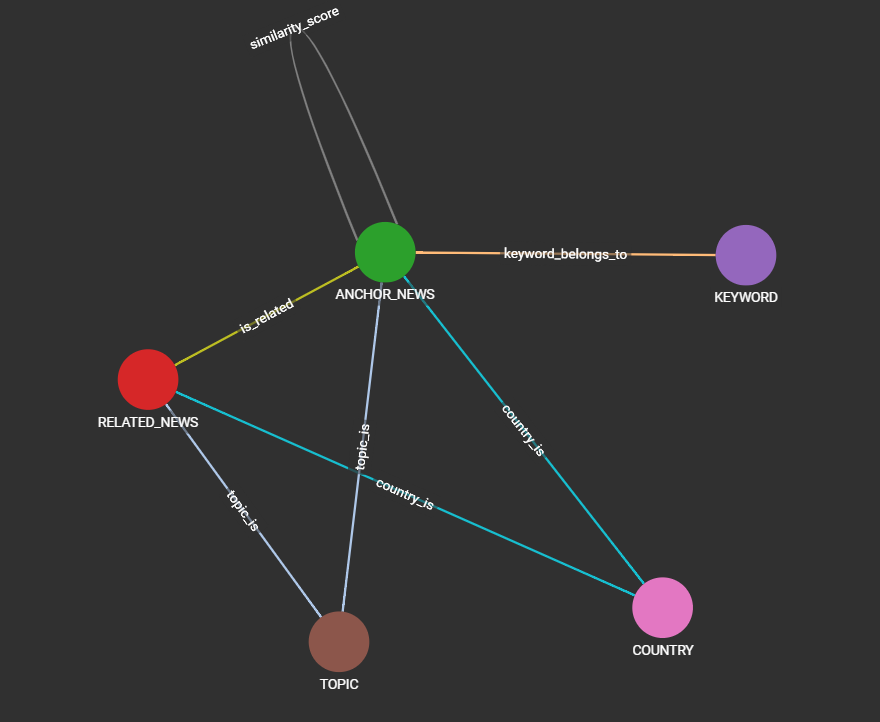

# Preprocess our dataframe

In [ ]:
# Drop unnecessary columns
pandas_table.drop(['author', 'published_date_precision','clean_url','excerpt','rights','language','authors','is_opinion','twitter_account','_score'], axis=1, inplace=True)

In [ ]:
pandas_table.head(2)

,title,published_date,link,summary,rank,topic,country,media,_id
0,Canadian sniper Wali: Ukraine will win the war,2022-04-10 15:21:02,https://www.marca.com/en/lifestyle/world-news/...,One of the most wanted people in the Ukraine v...,2345,sport,ES,https://phantom-marca.unidadeditorial.es/fa823...,59671cd36eb3fd8c1a67853e55773599
1,Ukraine vs Russia war: We can't bear it anymor...,2022-04-14 12:56:40,https://dailypost.ng/2022/04/14/ukraine-vs-rus...,The United Nations Secretary-General has insis...,13514,news,NG,https://dailypost.ng/wp-content/uploads/2018/0...,be1c523757a3ad137b44aa8ea0ad3d85


In [ ]:
len(pandas_table['title'])  # There are a total of 100 rows (news articles) in the pandas dataframe

100

## Semantic Search on summary of news article

In [ ]:
main_article_summary = pandas_table['summary'][0]

In [ ]:
print(main_article_summary)

One of the most wanted people in the Ukraine vs Russia conflictESCanadian sniper 'Wali' has become famous after joining up with the Ukrainian army to fight alongside their forces following Russia's invasion of their neighbouring country.Wali, who is computer scientist who served in the Afghan war during operations in Kandahar, is confident that Ukraine will win the war against Russia."We're going to win the war," Wali told El Mundo"I was on the front line in Irpin and Bucha. We helped liberate them, we fought face to face.


In [ ]:
remaining_articles_array = list(pandas_table['summary'][1:])
remaining_articles_array[0]

"The United Nations Secretary-General has insisted that the people of Ukraine cannot bear the violence being inflicted on them amid the ongoing war between Russia and Ukraine.\nUN Secretary-General, António Guterres, said this while calling for ‘the need to silence the guns and accelerate negotiations towards peace' between Ukraine and Russia.\nGuterres also warned that the world is on the brink of a 'perfect storm' as the war in Ukraine exacerbates an already struggling global economy.\nIn a press release on Wednesday, the UN chief said the war could lead to a 'three-dimensional crisis' in food, energy, and finance, areas that have already been hit hard by COVID-19 and climate change, he said."

In [ ]:
semantic_similarity_scores = [1]

In [ ]:
# Load Semantic Search Model
from sentence_transformers import SentenceTransformer, util
embedder =  SentenceTransformer('msmarco-distilbert-base-tas-b')

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/548 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
main_article_embedding = embedder.encode(main_article_summary)

In [ ]:
len(main_article_embedding)   # length of intermediate vector produced is 768

768

In [ ]:
remaining_articles_embeddings = embedder.encode(remaining_articles_array)

In [ ]:
cos_sim = util.cos_sim(main_article_embedding, remaining_articles_embeddings)

In [ ]:
# semantic search example
cos_sim # illustrates similarty between first news article and remaining 99 news articles in our dataset

tensor([[0.7914, 0.7494, 0.6862, 0.7459, 0.7690, 0.7371, 0.7914, 0.7599, 0.7176,
         0.7667, 0.7599, 0.6436, 0.7906, 0.7349, 0.7066, 0.7670, 0.7485, 0.7091,
         0.7339, 0.7549, 0.7655, 0.7539, 0.7777, 0.6766, 0.7404, 0.7939, 0.7217,
         0.7058, 0.7349, 0.7637, 0.7319, 0.7487, 0.7629, 0.7094, 0.7667, 0.7509,
         0.6700, 0.7223, 0.6579, 0.7614, 0.7003, 0.7407, 0.6916, 0.7900, 0.7049,
         0.7199, 0.7882, 0.7940, 0.7503, 0.7187, 0.7178, 0.7176, 0.7733, 0.6898,
         0.6907, 0.6199, 0.7248, 0.7384, 0.7522, 0.7488, 0.7542, 0.7324, 0.7695,
         0.6806, 0.6899, 0.7624, 0.7123, 0.7730, 0.7478, 0.7555, 0.6777, 0.7807,
         0.6811, 0.7551, 0.6503, 0.7868, 0.7405, 0.6998, 0.6794, 0.7567, 0.6385,
         0.6832, 0.7619, 0.6959, 0.7058, 0.6396, 0.7308, 0.6864, 0.7604, 0.7076,
         0.6555, 0.7646, 0.7778, 0.7574, 0.7307, 0.7277, 0.7578, 0.7436, 0.7618]])

In [ ]:
len(cos_sim[0])

99

In [ ]:
semantic_similarity_scores.extend(cos_sim[0])

In [ ]:
len(semantic_similarity_scores)

100

In [ ]:
# Add above semantic scores to our dataframe
# -- This will later be uploaded to our graph and will help us mine useful information
new_array = []
for x in semantic_similarity_scores:
    new_array.append(float(x))

print(new_array[0])

1.0


In [ ]:
# Add new column to pandas table
pandas_table['semantic_score'] = new_array

In [ ]:
# view updated dataframe
pandas_table.head(2)

,title,published_date,link,summary,rank,topic,country,media,_id,semantic_score
0,Canadian sniper Wali: Ukraine will win the war,2022-04-10 15:21:02,https://www.marca.com/en/lifestyle/world-news/...,One of the most wanted people in the Ukraine v...,2345,sport,ES,https://phantom-marca.unidadeditorial.es/fa823...,59671cd36eb3fd8c1a67853e55773599,1.000000
1,Ukraine vs Russia war: We can't bear it anymor...,2022-04-14 12:56:40,https://dailypost.ng/2022/04/14/ukraine-vs-rus...,The United Nations Secretary-General has insis...,13514,news,NG,https://dailypost.ng/wp-content/uploads/2018/0...,be1c523757a3ad137b44aa8ea0ad3d85,0.791384


## Sentiment Analysis on news Articles

In [ ]:
import nltk # already installed on Google Colab
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiment_model = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Sentiment analysis example on sample sentence
# -- we wil be applying the same on summaries of news articles and associate them with corresponding countries
sentiment_model.polarity_scores("The russia vs Ukraine war is getting more intense by the hour")

{'compound': -0.5118, 'neg': 0.252, 'neu': 0.645, 'pos': 0.103}

## Keyword extraction using NLP

In [ ]:
# Keyword extraction
from keybert import KeyBERT

doc = """
         The United Nations Secretary-General has insisted that the people of Ukraine cannot bear the violence being inflicted on them amid the ongoing war between Russia and Ukraine.
UN Secretary-General, António Guterres, said this while calling for ‘the need to silence the guns and accelerate negotiations towards peace' between Ukraine and Russia.
Guterres also warned that the world is on the brink of a 'perfect storm' as the war in Ukraine exacerbates an already struggling global economy.
In a press release on Wednesday, the UN chief said the war could lead to a 'three-dimensional crisis' in food, energy, and finance, areas that have already been hit hard by COVID-19 and climate change, he said.
      """
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc,)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# Example of keywords, extracted from a news article from our dataset
print(keywords)

[('ukraine', 0.3663), ('crisis', 0.3358), ('war', 0.3099), ('storm', 0.2905), ('nations', 0.2816)]


In [ ]:
# Data structures for storing our keywords and sentiment
# -- will later be helpful to easily load data to graph
keyword1 = []
keyword2 = []
keyword3 = []
intent = []

In [ ]:
# Takes a while to execute
# -- Create new metadata for our news articles
for x in list(pandas_table['summary']):
    keywords = kw_model.extract_keywords(x)
    keyword1.append(keywords[0][0])
    keyword2.append(keywords[1][0])
    keyword3.append(keywords[2][0])
    sentiment_result = sentiment_model.polarity_scores(x) 
    positive = sentiment_result['pos']
    negative = sentiment_result['neg']
    final_result = ""

    if positive > negative:
        final_result = "postive"
    else:
        final_result = "negative"    

    intent.append(final_result)  

In [ ]:
# Add these new columns to the pandas table
pandas_table['Keyword 1'] = keyword1
pandas_table['Keyword 2'] = keyword2
pandas_table['Keyword 3'] = keyword3
pandas_table['Intent'] = intent

In [ ]:
# View refined dataset
pandas_table.head(2)

,title,published_date,link,summary,rank,topic,country,media,_id,semantic_score,Keyword 1,Keyword 2,Keyword 3,Intent
0,Canadian sniper Wali: Ukraine will win the war,2022-04-10 15:21:02,https://www.marca.com/en/lifestyle/world-news/...,One of the most wanted people in the Ukraine v...,2345,sport,ES,https://phantom-marca.unidadeditorial.es/fa823...,59671cd36eb3fd8c1a67853e55773599,1.000000,wali,ukraine,ukrainian,negative
1,Ukraine vs Russia war: We can't bear it anymor...,2022-04-14 12:56:40,https://dailypost.ng/2022/04/14/ukraine-vs-rus...,The United Nations Secretary-General has insis...,13514,news,NG,https://dailypost.ng/wp-content/uploads/2018/0...,be1c523757a3ad137b44aa8ea0ad3d85,0.791384,ukraine,crisis,war,negative


# Create The Graph and Connect To It

In [ ]:
# Run only once, after schema is defined
results = conn.gsql('CREATE GRAPH Gemini(ANCHOR_NEWS, RELATED_NEWS, KEYWORD, TOPIC, COUNTRY, similarity_score, is_related, country_is, topic_is, keyword_belongs_to)')
print(results)

Semantic Check Fails: The graph name conflicts with another type or existing graph names! Please use a different name.
The graph Gemini could not be created!


In [ ]:
# Retrieve Auth token from TigerGraph
conn.graphname="Gemini"
secret = conn.createSecret()
authToken = conn.getToken(secret)
authToken = authToken[0]
print(authToken)

conn = tg.TigerGraphConnection(host=hostName, graphname="Gemini", username=userName, password=password, apiToken=authToken)

def pprint(string):
  print(json.dumps(string, indent=2))

c7qjvbhdnt46cu60mem9opbsacf17612


# Loading Data to Graph

In [ ]:
# First, let us convert our pandas dataframe to a csv
pandas_table.to_csv('news_data.csv',index=False)

In [ ]:
pandas_table.head(1) # View single news article data and meta-data

,title,published_date,link,summary,rank,topic,country,media,_id,semantic_score,Keyword 1,Keyword 2,Keyword 3,Intent
0,Canadian sniper Wali: Ukraine will win the war,2022-04-10 15:21:02,https://www.marca.com/en/lifestyle/world-news/...,One of the most wanted people in the Ukraine v...,2345,sport,ES,https://phantom-marca.unidadeditorial.es/fa823...,59671cd36eb3fd8c1a67853e55773599,1.0,wali,ukraine,ukrainian,negative


## Terminology:

**Anchor Vertex**: I am calling news articles with unique insights, the ones with different content from the rest as 'Anchor vertices' (*hyper-nodes*). This is because news articles relevant to these (the duplicates) get attached to these anchors according to which anchor they are most similar to.

Anchor vertices are indirectly connected to each other by 'similarity score' edges. 

Example image below.

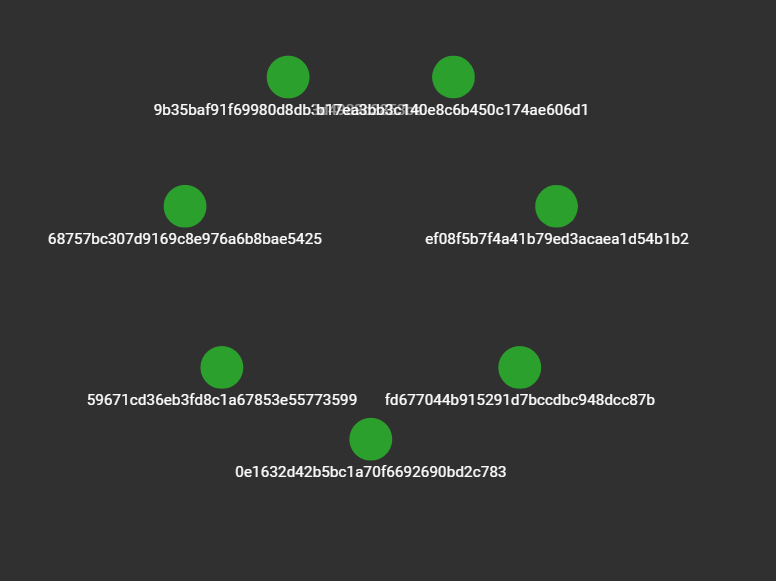

In [ ]:
anchor_vertices = []
anchor_vertices.append(pandas_table['summary'][0])
anchor_vertices

['One of the most wanted people in the Ukraine vs Russia conflictESCanadian sniper \'Wali\' has become famous after joining up with the Ukrainian army to fight alongside their forces following Russia\'s invasion of their neighbouring country.Wali, who is computer scientist who served in the Afghan war during operations in Kandahar, is confident that Ukraine will win the war against Russia."We\'re going to win the war," Wali told El Mundo"I was on the front line in Irpin and Bucha. We helped liberate them, we fought face to face.']

In [ ]:
# Create mapping between Anchor Vertices and corresponding Children
anchor_to_children = {pandas_table['_id'][0]: []}
anchor_to_children

{'59671cd36eb3fd8c1a67853e55773599': []}

# LOAD DATA

In [ ]:
# Iterate over dataframe and load data into graph -- Takes a long time (approx 8 to 9 mins for 100 news articles)
countries = {}
keywords = {}
topics = {}
THRESHOLD = 0.7    # 70 percent is the selected similarity threshold, change as per your need
summary_to_id = {}
id_to_semantic = {}

# Populate countries first
for index, row in pandas_table.iterrows():
    summary_to_id[row['summary']] = row['_id']
    id_to_semantic[row['_id']] = float(row['semantic_score'])
    country = row['country']
    if country not in countries:
        if intent == 'positive':
            countries[country] = {'positive':1, 'negative':0}
        else:
            countries[country] = {'positive':0, 'negative':1}
    else:
        if intent == 'positive':
            countries[country]['positive'] += 1
        else:
            countries[country]['negative'] += 1 

# Create country vertices/upsert country vertices to graph
for each_country in countries:
    country_insert_status = conn.upsertVertex("COUNTRY",each_country,{'positive':countries[each_country]['positive'], 'negative':countries[each_country]['negative']}) 
    if country_insert_status == 1:
        print(f"Country vertex {each_country} INSERTED successfully")              


# Upload all news articles one by one, with their related attributes and edges
for index, row in pandas_table.iterrows():
    title = row['title']
    published_date = row['published_date']
    link = row['link']
    summary = row['summary']
    rank = int(row['rank'])
    topic = row['topic']
    country = row['country']
    media = row['media']
    id = row['_id']
    semantic_score = float(row['semantic_score'])
    keyword1 = row['Keyword 1']
    keyword2 = row['Keyword 2']
    keyword3 = row['Keyword 3']
    intent = row['Intent']

    # Upsert vertices with their data and attributes
    if topic not in topics:
        topics[topic] = True
        topic_insert_status = conn.upsertVertex("TOPIC", topic)
        if topic_insert_status == 1:
            print(f"Topic vertex {topic} INSERTED successfully")

    if keyword1 not in keywords:
        keywords[keyword1] = True
        keyword1_insert_status = conn.upsertVertex("KEYWORD", keyword1)
        if keyword1_insert_status == 1:
            print(f"Keyword vertex {keyword1} INSERTED successfully")

    if keyword2 not in keywords:
        keywords[keyword2] = True
        keyword2_insert_status = conn.upsertVertex("KEYWORD", keyword2)
        if keyword2_insert_status == 1:
            print(f"Keyword vertex {keyword2} INSERTED successfully") 

    if keyword3 not in keywords:
        keywords[keyword3] = True
        keyword3_insert_status = conn.upsertVertex("KEYWORD", keyword3)
        if keyword3_insert_status == 1:
            print(f"Keyword vertex {keyword3} INSERTED successfully") 

    if index == 0:
        # Insert first Anchor article
        anchor_insert_status = conn.upsertVertex("ANCHOR_NEWS",id,{'rank':rank,'summary':summary,'link':link,'published_date':published_date,'title':title,'media':media})
        if anchor_insert_status == 1:
            print(f"First Anchor vertex INSERTED successfully")  

        # Create associated edges
        country_edge_status = conn.upsertEdge("COUNTRY", country, "country_is", "ANCHOR_NEWS", id)
        if country_edge_status == 1:
            print(f"Country edge between {country} and anchor news {title} success")

        topic_edge_status = conn.upsertEdge("TOPIC", topic, "topic_is", "ANCHOR_NEWS", id)
        if topic_edge_status == 1:
            print(f"Topic edge between {topic} and anchor news {title} success")

        keyword1_edge_status = conn.upsertEdge("KEYWORD", keyword1, "keyword_belongs_to", "ANCHOR_NEWS", id)
        if keyword1_edge_status == 1:
            print(f"Keyword edge between {keyword1} and anchor news {title} success")

        keyword2_edge_status = conn.upsertEdge("KEYWORD", keyword2, "keyword_belongs_to", "ANCHOR_NEWS", id)
        if keyword2_edge_status == 1:
            print(f"Keyword edge between {keyword2} and anchor news {title} success")

        keyword3_edge_status = conn.upsertEdge("KEYWORD", keyword3, "keyword_belongs_to", "ANCHOR_NEWS", id)
        if keyword3_edge_status == 1:
            print(f"Keyword edge between {keyword3} and anchor news {title} success")

    # Following news articles
    else:
        # Semantic search and cosine similarity between current news article and all existing anchor news articles
        # This is where deduplication is done and a particular news article 
        # is classified as 'Anchor News' or 'Related News'
        query_article_embedding = embedder.encode(summary)      
        anchor_embeddings = embedder.encode(anchor_vertices)
        cosine_similarities = util.cos_sim(query_article_embedding,anchor_embeddings)[0]  

        print(cosine_similarities)

        closest_to = -1
        sim = 0
        index = 0
        for value in cosine_similarities:
            if float(value) > THRESHOLD and float(value) > sim:
                closest_to = index
                sim = float(value)
            index += 1 

        if closest_to == -1:                  # is a new 'anchor article'
            anchor_vertices.append(summary)  
            anchor_to_children[id] = []
            
            anchor_insert_status = conn.upsertVertex("ANCHOR_NEWS",id,{'rank':rank,'summary':summary,'link':link,'published_date':published_date,'title':title,'media':media})
            if anchor_insert_status == 1:
                print(f"Anchor vertex {title} INSERTED successfully")

            country_edge_status = conn.upsertEdge("COUNTRY", country, "country_is", "ANCHOR_NEWS", id)
            if country_edge_status == 1:
                print(f"Country edge between {country} and anchor news {title} success")

            topic_edge_status = conn.upsertEdge("TOPIC", topic, "topic_is", "ANCHOR_NEWS", id)
            if topic_edge_status == 1:
                print(f"Topic edge between {topic} and anchor news {title} success")

            keyword1_edge_status = conn.upsertEdge("KEYWORD", keyword1, "keyword_belongs_to", "ANCHOR_NEWS", id)
            if keyword1_edge_status == 1:
                print(f"Keyword edge between {keyword1} and anchor news {title} success")

            keyword2_edge_status = conn.upsertEdge("KEYWORD", keyword2, "keyword_belongs_to", "ANCHOR_NEWS", id)
            if keyword2_edge_status == 1:
                print(f"Keyword edge between {keyword2} and anchor news {title} success")

            keyword3_edge_status = conn.upsertEdge("KEYWORD", keyword3, "keyword_belongs_to", "ANCHOR_NEWS", id)
            if keyword3_edge_status == 1:
                print(f"Keyword edge between {keyword3} and anchor news {title} success")

            simscore_edge_status = conn.upsertEdge("ANCHOR_NEWS", "59671cd36eb3fd8c1a67853e55773599", "similarity_score", "ANCHOR_NEWS", id, {'score':id_to_semantic[id]})
            if simscore_edge_status == 1:
                print(f"Similarity score edge success")    

        
        else:                                  # is a 'related article'
            anchor_id = summary_to_id[anchor_vertices[closest_to]]
            anchor_to_children[anchor_id].append(id)

            related_insert_status = conn.upsertVertex("RELATED_NEWS",id,{'rank':rank,'summary':summary,'link':link,'published_date':published_date,'title':title,'media':media})
            if related_insert_status == 1:
                print(f"Related news vertex {title} INSERTED successfully")

            country_edge_status = conn.upsertEdge("COUNTRY", country, "country_is", "RELATED_NEWS", id)
            if country_edge_status == 1:
                print(f"Country edge between {country} and related news {title} success")

            topic_edge_status = conn.upsertEdge("TOPIC", topic, "topic_is", "RELATED_NEWS", id)
            if topic_edge_status == 1:
                print(f"Topic edge between {topic} and related news {title} success")

            relation_edge_status = conn.upsertEdge("ANCHOR_NEWS", anchor_id, "is_related", "RELATED_NEWS", id)
            if relation_edge_status == 1:
                print(f"Relation edge between {anchor_id} and related news {id} success")                                                                 


Country vertex ES INSERTED successfully
Country vertex NG INSERTED successfully
Country vertex US INSERTED successfully
Country vertex PK INSERTED successfully
Country vertex GB INSERTED successfully
Country vertex unknown INSERTED successfully
Country vertex IN INSERTED successfully
Country vertex MY INSERTED successfully
Country vertex CA INSERTED successfully
Country vertex PH INSERTED successfully
Country vertex ZA INSERTED successfully
Country vertex DE INSERTED successfully
Country vertex CN INSERTED successfully
Country vertex RU INSERTED successfully
Country vertex BG INSERTED successfully
Country vertex IL INSERTED successfully
Country vertex AU INSERTED successfully
Country vertex HK INSERTED successfully
Country vertex JP INSERTED successfully
Country vertex AF INSERTED successfully
Country vertex BE INSERTED successfully
First Anchor vertex INSERTED successfully
Country edge between ES and anchor news Canadian sniper Wali: Ukraine will win the war success
Topic edge between

In [ ]:
len(anchor_vertices)  # number of anchor news or Distinct news

7

All data has been loaded successfully. View the GraphStudio to confirm, see connections.

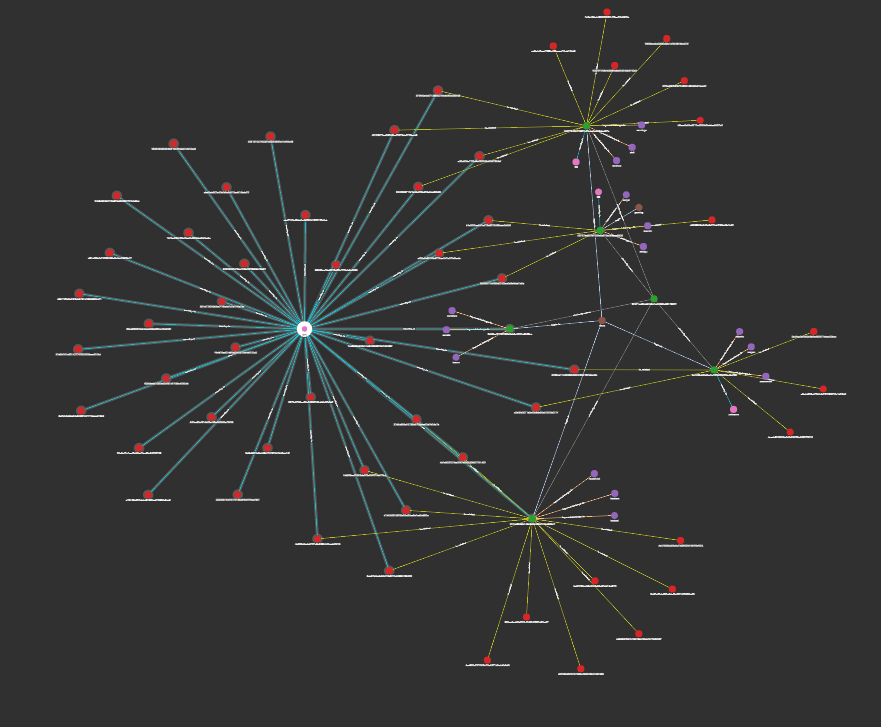

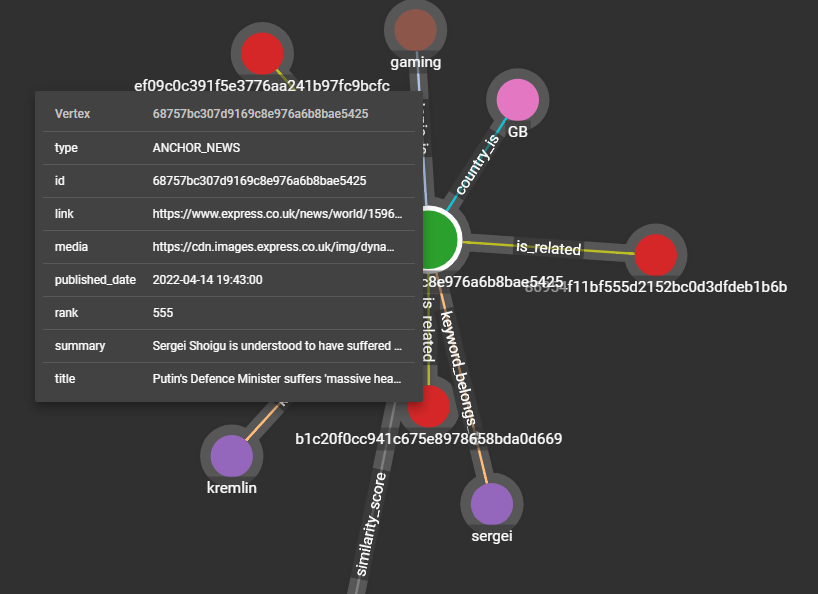

## View of the graph from a **Country** perspective

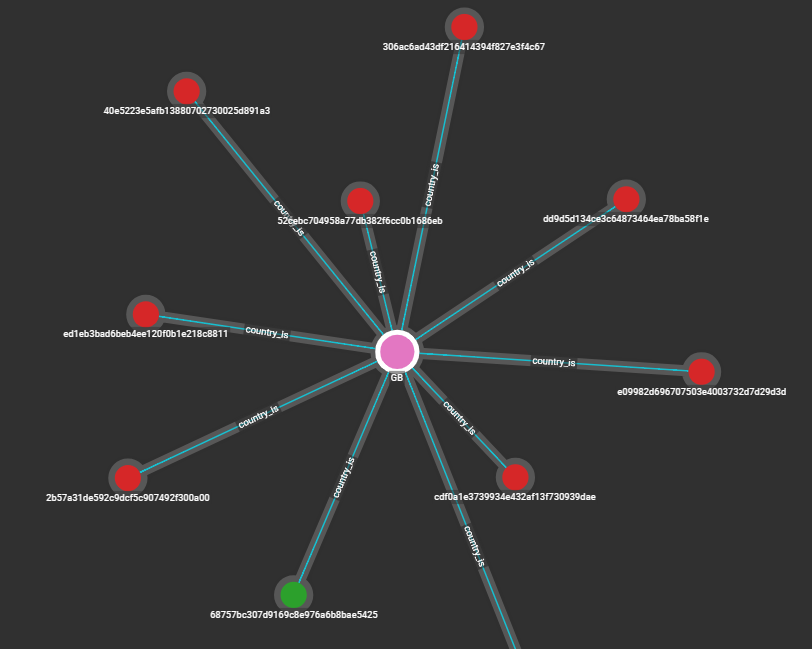

# Visualization and Inference

In [ ]:
# Exploring graph
# -- Displaying vertex types and edge types in the graph
vertices = conn.getVertexTypes()
print(f"Vertices: {vertices}")


edges = conn.getEdgeTypes()
print(f"Edges: {edges}")

Vertices: ['ANCHOR_NEWS', 'RELATED_NEWS', 'KEYWORD', 'TOPIC', 'COUNTRY']
Edges: ['similarity_score', 'is_related', 'country_is', 'topic_is', 'keyword_belongs_to']


In [ ]:
# Exploring individual vertex type and edge type
print(f"Results for Country vertex")
pprint(conn.getVertexType("COUNTRY"))

print()

print(f"Results for Topics edge")
pprint(conn.getEdgeType("topic_is"))

Results for Country vertex
{
  "Config": {
    "TAGGABLE": false,
    "STATS": "OUTDEGREE_BY_EDGETYPE",
    "PRIMARY_ID_AS_ATTRIBUTE": false
  },
  "Attributes": [
    {
      "AttributeType": {
        "Name": "INT"
      },
      "IsPartOfCompositeKey": false,
      "PrimaryIdAsAttribute": false,
      "AttributeName": "positive",
      "HasIndex": false,
      "internalAttribute": false,
      "IsPrimaryKey": false
    },
    {
      "AttributeType": {
        "Name": "INT"
      },
      "IsPartOfCompositeKey": false,
      "PrimaryIdAsAttribute": false,
      "AttributeName": "negative",
      "HasIndex": false,
      "internalAttribute": false,
      "IsPrimaryKey": false
    }
  ],
  "PrimaryId": {
    "AttributeType": {
      "Name": "STRING"
    },
    "IsPartOfCompositeKey": false,
    "PrimaryIdAsAttribute": false,
    "AttributeName": "name",
    "HasIndex": false,
    "internalAttribute": false,
    "IsPrimaryKey": false
  },
  "Name": "COUNTRY"
}

Results for Topics edge


In [ ]:
# Counting Graph Data
print("Vertex Counts")
for vertex in vertices:
  print(f"There are {conn.getVertexCount(vertex)} {vertex} vertices in the graph")

print("--------------")
print("Edge Counts")
for edge in edges:
  print(f"There are {conn.getEdgeCount(edge)} {edge} edges in the graph")

Vertex Counts
There are 7 ANCHOR_NEWS vertices in the graph
There are 93 RELATED_NEWS vertices in the graph
There are 21 KEYWORD vertices in the graph
There are 10 TOPIC vertices in the graph
There are 21 COUNTRY vertices in the graph
--------------
Edge Counts
There are 6 similarity_score edges in the graph
There are 93 is_related edges in the graph
There are 100 country_is edges in the graph
There are 100 topic_is edges in the graph
There are 21 keyword_belongs_to edges in the graph


In [ ]:
# Getting Individual Vertex
vertex_results = conn.getVerticesById("COUNTRY", "US") # Details about 'COUNTRY' vertex called 'US' (sentiment attribute values have also been rightly returned)
pprint(vertex_results)

[
  {
    "v_id": "US",
    "v_type": "COUNTRY",
    "attributes": {
      "positive": 0,
      "negative": 40
    }
  }
]


In [ ]:
# Count Edges Connected to a Particular Vertex
results = conn.getEdgeCountFrom("COUNTRY", "US")
pprint(results)

{
  "similarity_score": 0,
  "is_related": 0,
  "country_is": 40,
  "topic_is": 0,
  "keyword_belongs_to": 0
}


In [ ]:
results = conn.getEdgeCountFrom("ANCHOR_NEWS", "59671cd36eb3fd8c1a67853e55773599") # one of the anchor news
pprint(results)

{
  "similarity_score": 6,
  "is_related": 61,
  "country_is": 1,
  "topic_is": 1,
  "keyword_belongs_to": 3
}


In [ ]:
# Display all Edges Connected to a Particular Vertex
r1 = conn.getEdges("RELATED_NEWS", "87d8e333c13733a8105abc92d7d04c7b")
pprint(r1)

[
  {
    "e_type": "is_related",
    "directed": false,
    "from_id": "87d8e333c13733a8105abc92d7d04c7b",
    "from_type": "RELATED_NEWS",
    "to_id": "b17ea3bb3c140e8c6b450c174ae606d1",
    "to_type": "ANCHOR_NEWS",
    "attributes": {}
  },
  {
    "e_type": "country_is",
    "directed": false,
    "from_id": "87d8e333c13733a8105abc92d7d04c7b",
    "from_type": "RELATED_NEWS",
    "to_id": "US",
    "to_type": "COUNTRY",
    "attributes": {}
  },
  {
    "e_type": "topic_is",
    "directed": false,
    "from_id": "87d8e333c13733a8105abc92d7d04c7b",
    "from_type": "RELATED_NEWS",
    "to_id": "world",
    "to_type": "TOPIC",
    "attributes": {}
  }
]


In [ ]:
# Vertex set to dataframe
df3 = conn.vertexSetToDataFrame(vertex_results)
print(df3)

  v_id  positive  negative
0   US         0        40


In [ ]:
df3

,v_id,positive,negative
0,US,0,40


In [ ]:
# edge set to dataframe
df4 = conn.getEdgesDataframe("RELATED_NEWS", "87d8e333c13733a8105abc92d7d04c7b")
df4

,from_type,from_id,to_type,to_id
0,RELATED_NEWS,87d8e333c13733a8105abc92d7d04c7b,ANCHOR_NEWS,b17ea3bb3c140e8c6b450c174ae606d1
1,RELATED_NEWS,87d8e333c13733a8105abc92d7d04c7b,COUNTRY,US
2,RELATED_NEWS,87d8e333c13733a8105abc92d7d04c7b,TOPIC,world


In [ ]:
# Pathfinding 
shortest_path_results = conn.shortestPath([("COUNTRY", "US")], [("COUNTRY", "ES")])
pprint(shortest_path_results)

[{'type': 'COUNTRY', 'id': 'US'}]
[{'type': 'COUNTRY', 'id': 'ES'}]
[
  {
    "vertices": [
      {
        "v_id": "59671cd36eb3fd8c1a67853e55773599",
        "v_type": "ANCHOR_NEWS",
        "attributes": {
          "id": "59671cd36eb3fd8c1a67853e55773599",
          "rank": 2345,
          "summary": "One of the most wanted people in the Ukraine vs Russia conflictESCanadian sniper 'Wali' has become famous after joining up with the Ukrainian army to fight alongside their forces following Russia's invasion of their neighbouring country.Wali, who is computer scientist who served in the Afghan war during operations in Kandahar, is confident that Ukraine will win the war against Russia.\"We're going to win the war,\" Wali told El Mundo\"I was on the front line in Irpin and Bucha. We helped liberate them, we fought face to face.",
          "link": "https://www.marca.com/en/lifestyle/world-news/2022/04/10/6252f55646163ffd908b45b3.html",
          "published_date": "2022-04-10 15:21:02",


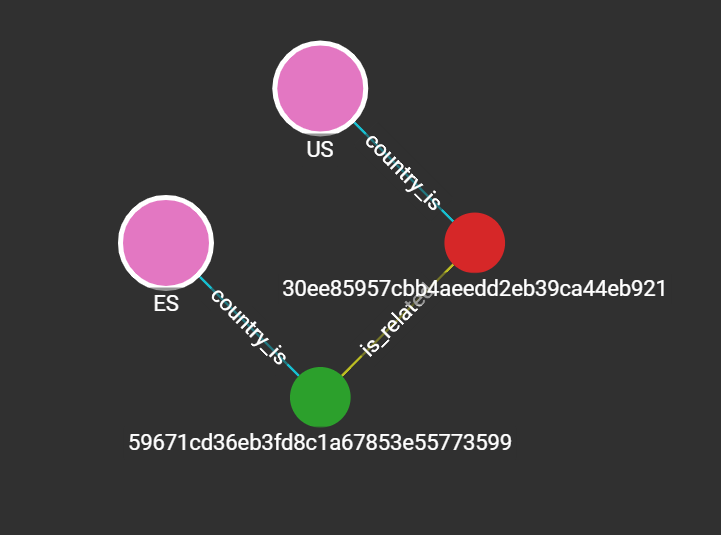

In [ ]:
# Pathfinding 
all_path_results = conn.allPaths([("COUNTRY", "US")], [("COUNTRY", "ES")],maxLength=6)
pprint(all_path_results)

Streaming output truncated to the last 5000 lines.
        "v_id": "93034548846503f10af9a2e61dc72cc8",
        "v_type": "RELATED_NEWS",
        "attributes": {
          "id": "93034548846503f10af9a2e61dc72cc8",
          "rank": 9867,
          "summary": "Russia has had a bad week in Ukraine. On April 13, either a Ukrainian missile strike or onboard explosion took out the cruiser 'Moskva,' flagship of Russia's Black Sea Fleet; Sweden's and Finland's prime ministers announced that they were moving toward a near-term decision to seek NATO membership; and the Biden administration announced its most impactful weapons transfer yet to Ukraine. That announcement followed President Joe Biden's April 12 assertion that Russian actions in Ukraine appeared to be genocide and National Security Advisor Jake Sullivan's April 10 forward-leaning statement on 'Meet the Press' of U.",
          "link": "https://www.justsecurity.org/81135/putins-next-play-in-ukraine-and-how-the-us-and-allies-can-prepar

Visual Output in TigerGraph Studio for the above All Path finding Query:

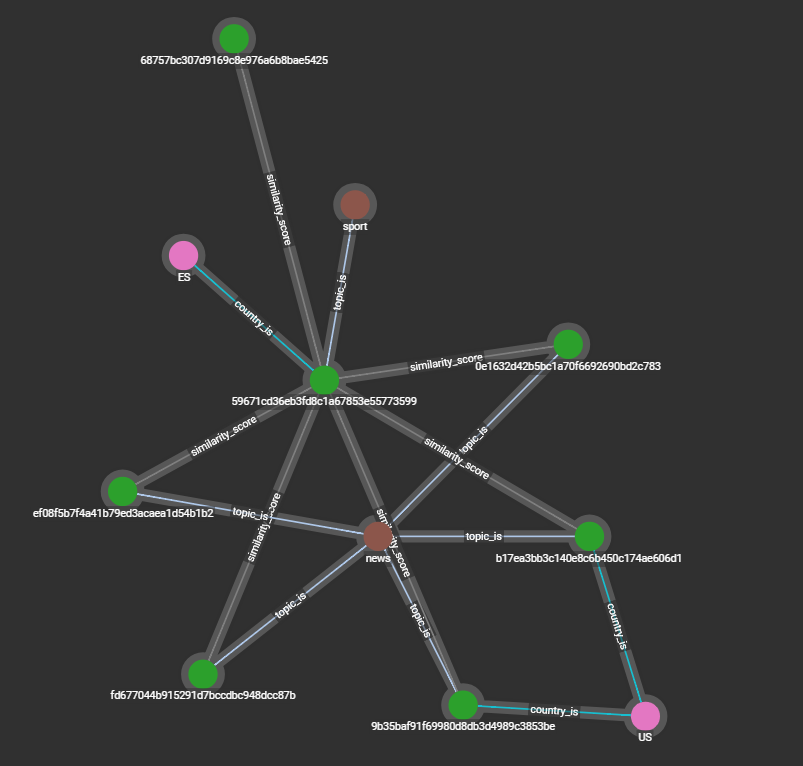

In [ ]:
# Retrieving all anchor vertices
query_result = conn.gsql('''
  USE GRAPH Gemini
  INTERPRET QUERY () SYNTAX V2{
      anchors = SELECT a FROM ANCHOR_NEWS:a
                ORDER BY a.rank ASC;

      PRINT anchors[anchors.link,anchors.media,anchors.rank,anchors.summary,anchors.title];          
  }
  ''')
pprint(query_result)

"Using graph 'Gemini'\n{\n\"error\": false,\n\"message\": \"\",\n\"version\": {\n\"schema\": 0,\n\"edition\": \"enterprise\",\n\"api\": \"v2\"\n},\n\"results\": [{\"anchors\": [\n{\n\"v_id\": \"68757bc307d9169c8e976a6b8bae5425\",\n\"attributes\": {\n\"anchors.link\": \"https://www.express.co.uk/news/world/1596305/putin-news-defence-minister-heart-attack-Russia-Ukraine-war\",\n\"anchors.rank\": 555,\n\"anchors.summary\": \"Sergei Shoigu is understood to have suffered an attack that was caused by foul play.\u00a0Reports suggest he is now in intensive care, though this has not been confirmed.Russian-Israeli businessmen Leonid Nevzlin made the claim today, on Thursday.He said Shoigu, 66, suffered a 'massive heart attack', adding this 'could not have occurred due to natural causes'.The implications of this, if true, are serious, perhaps pointing the finger to an attempted assassination at the heart of the Kremlin.Nevzlin cited sources from Moscow as the providers of his information.\",\n\"a

In [ ]:
query_result

'Using graph \'Gemini\'\n{\n"error": false,\n"message": "",\n"version": {\n"schema": 0,\n"edition": "enterprise",\n"api": "v2"\n},\n"results": [{"anchors": [\n{\n"v_id": "68757bc307d9169c8e976a6b8bae5425",\n"attributes": {\n"anchors.link": "https://www.express.co.uk/news/world/1596305/putin-news-defence-minister-heart-attack-Russia-Ukraine-war",\n"anchors.rank": 555,\n"anchors.summary": "Sergei Shoigu is understood to have suffered an attack that was caused by foul play.\xa0Reports suggest he is now in intensive care, though this has not been confirmed.Russian-Israeli businessmen Leonid Nevzlin made the claim today, on Thursday.He said Shoigu, 66, suffered a \'massive heart attack\', adding this \'could not have occurred due to natural causes\'.The implications of this, if true, are serious, perhaps pointing the finger to an attempted assassination at the heart of the Kremlin.Nevzlin cited sources from Moscow as the providers of his information.",\n"anchors.media": "https://cdn.images.

### Analyzing Country sentiment for given news

In [ ]:
# Running Interpreted queries
country_result = conn.gsql('''
  USE GRAPH Gemini
  INTERPRET QUERY () SYNTAX V2{
      countries = SELECT c FROM COUNTRY:c
                ORDER BY c.negative DESC;

      PRINT countries[countries.negative];          
  }
  ''')
pprint(country_result)

"Using graph 'Gemini'\n{\n\"error\": false,\n\"message\": \"\",\n\"version\": {\n\"schema\": 0,\n\"edition\": \"enterprise\",\n\"api\": \"v2\"\n},\n\"results\": [{\"countries\": [\n{\n\"v_id\": \"US\",\n\"attributes\": {\"countries.negative\": 40},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"IN\",\n\"attributes\": {\"countries.negative\": 10},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"GB\",\n\"attributes\": {\"countries.negative\": 10},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"unknown\",\n\"attributes\": {\"countries.negative\": 8},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"DE\",\n\"attributes\": {\"countries.negative\": 3},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"CA\",\n\"attributes\": {\"countries.negative\": 3},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"PH\",\n\"attributes\": {\"countries.negative\": 3},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"PK\",\n\"attributes\": {\"countries.negative\": 3},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"JP\",\n\"attributes\

In [ ]:
country_result

'Using graph \'Gemini\'\n{\n"error": false,\n"message": "",\n"version": {\n"schema": 0,\n"edition": "enterprise",\n"api": "v2"\n},\n"results": [{"countries": [\n{\n"v_id": "US",\n"attributes": {"countries.negative": 40},\n"v_type": "COUNTRY"\n},\n{\n"v_id": "IN",\n"attributes": {"countries.negative": 10},\n"v_type": "COUNTRY"\n},\n{\n"v_id": "GB",\n"attributes": {"countries.negative": 10},\n"v_type": "COUNTRY"\n},\n{\n"v_id": "unknown",\n"attributes": {"countries.negative": 8},\n"v_type": "COUNTRY"\n},\n{\n"v_id": "PK",\n"attributes": {"countries.negative": 3},\n"v_type": "COUNTRY"\n},\n{\n"v_id": "DE",\n"attributes": {"countries.negative": 3},\n"v_type": "COUNTRY"\n},\n{\n"v_id": "PH",\n"attributes": {"countries.negative": 3},\n"v_type": "COUNTRY"\n},\n{\n"v_id": "JP",\n"attributes": {"countries.negative": 3},\n"v_type": "COUNTRY"\n},\n{\n"v_id": "BG",\n"attributes": {"countries.negative": 3},\n"v_type": "COUNTRY"\n},\n{\n"v_id": "CA",\n"attributes": {"countries.negative": 3},\n"v_typ

In [ ]:
# Create query
results = conn.gsql('''
  USE GRAPH Gemini
  CREATE QUERY country_negatives() FOR GRAPH Gemini SYNTAX V2{
      countries = SELECT c FROM COUNTRY:c
                ORDER BY c.negative DESC;

      PRINT countries[countries.negative];
             
  }
  ''')
pprint(results)

"Using graph 'Gemini'\nSuccessfully created queries: [country_negatives]."


In [ ]:
# installing queries
conn.gsql('''
  INSTALL QUERY country_negatives 
''')

'Start installing queries, about 1 minute ...\ncountry_negatives query: curl -X GET \'https://127.0.0.1:9000/query/Gemini/country_negatives\'. Add -H "Authorization: Bearer TOKEN" if authentication is enabled.\nSelect \'m1\' as compile server, now connecting ...\nNode \'m1\' is prepared as compile server.\n\nQuery installation finished.'

In [ ]:
# Run the installed query
results3 = conn.runInstalledQuery("country_negatives")
pprint(results3)

[
  {
    "countries": [
      {
        "v_id": "US",
        "v_type": "COUNTRY",
        "attributes": {
          "countries.negative": 40
        }
      },
      {
        "v_id": "GB",
        "v_type": "COUNTRY",
        "attributes": {
          "countries.negative": 10
        }
      },
      {
        "v_id": "IN",
        "v_type": "COUNTRY",
        "attributes": {
          "countries.negative": 10
        }
      },
      {
        "v_id": "unknown",
        "v_type": "COUNTRY",
        "attributes": {
          "countries.negative": 8
        }
      },
      {
        "v_id": "CA",
        "v_type": "COUNTRY",
        "attributes": {
          "countries.negative": 3
        }
      },
      {
        "v_id": "PK",
        "v_type": "COUNTRY",
        "attributes": {
          "countries.negative": 3
        }
      },
      {
        "v_id": "JP",
        "v_type": "COUNTRY",
        "attributes": {
          "countries.negative": 3
        }
      },
      {
       

In [ ]:
country_sentiment_df = pd.DataFrame(results3[0]['countries'])
country_sentiment_df

,v_id,v_type,attributes
0,US,COUNTRY,{'countries.negative': 40}
1,GB,COUNTRY,{'countries.negative': 10}
2,IN,COUNTRY,{'countries.negative': 10}
3,unknown,COUNTRY,{'countries.negative': 8}
4,CA,COUNTRY,{'countries.negative': 3}
5,PK,COUNTRY,{'countries.negative': 3}
6,JP,COUNTRY,{'countries.negative': 3}
7,PH,COUNTRY,{'countries.negative': 3}
8,BG,COUNTRY,{'countries.negative': 3}
9,DE,COUNTRY,{'countries.negative': 3}


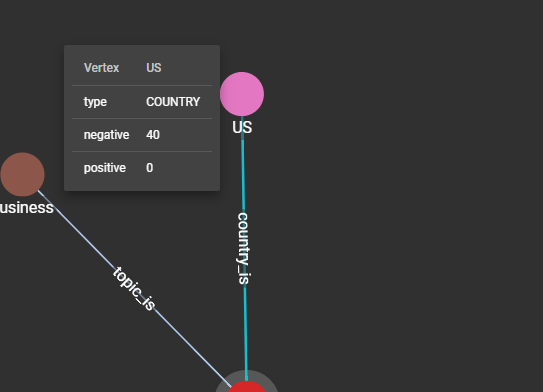

**Conclusion** from above results: Many articles from US have a negative sentiment related to the search term/news.

### Similarly, you can run many more unique queries to mine valuable information from the data.

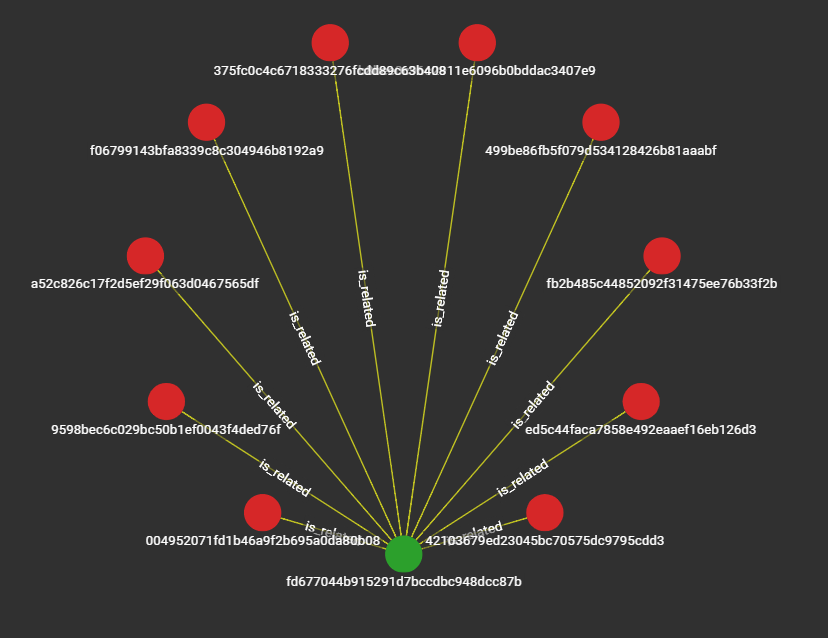

# Overall Summary
We now have separated initial huge number of news articles into 'anchor news' and 'related news' respectively. A powerful thing we can now do is combine the anchor news to give a summary of the whole topic/news at hand. This way, we are able to consolidate all viewpoints/perspectives from different news articles into one long-form passage and give it to the reader.

In [ ]:
# First, let us retrieve all the anchor news articles from our dataset
# -- we have to create a query, install and run it.
anchors = conn.gsql('''
  USE GRAPH Gemini
  CREATE QUERY get_anchors() FOR GRAPH Gemini SYNTAX V2{
      anchors = SELECT a FROM ANCHOR_NEWS:a
                ORDER BY a.rank ASC;

      PRINT anchors[anchors.link,anchors.media,anchors.rank,anchors.summary,anchors.title];
             
  }
  ''')
pprint(anchors)


# installing queries
conn.gsql('''
  INSTALL QUERY get_anchors
''')

# run installed query
result_anchors = conn.runInstalledQuery("get_anchors")
pprint(result_anchors)

# Convert to dataframe
anchors_df = pd.DataFrame(result_anchors[0]['anchors'])
print(anchors_df)

"Using graph 'Gemini'\nSuccessfully created queries: [get_anchors]."
[
  {
    "anchors": [
      {
        "v_id": "68757bc307d9169c8e976a6b8bae5425",
        "v_type": "ANCHOR_NEWS",
        "attributes": {
          "anchors.link": "https://www.express.co.uk/news/world/1596305/putin-news-defence-minister-heart-attack-Russia-Ukraine-war",
          "anchors.media": "https://cdn.images.express.co.uk/img/dynamic/78/750x445/1596305.jpg",
          "anchors.rank": 555,
          "anchors.summary": "Sergei Shoigu is understood to have suffered an attack that was caused by foul play.\u00a0Reports suggest he is now in intensive care, though this has not been confirmed.Russian-Israeli businessmen Leonid Nevzlin made the claim today, on Thursday.He said Shoigu, 66, suffered a 'massive heart attack', adding this 'could not have occurred due to natural causes'.The implications of this, if true, are serious, perhaps pointing the finger to an attempted assassination at the heart of the Kremlin.Ne

In [ ]:
anchors_df['attributes'][0]

{'anchors.link': 'https://www.express.co.uk/news/world/1596305/putin-news-defence-minister-heart-attack-Russia-Ukraine-war',
 'anchors.media': 'https://cdn.images.express.co.uk/img/dynamic/78/750x445/1596305.jpg',
 'anchors.rank': 555,
 'anchors.summary': "Sergei Shoigu is understood to have suffered an attack that was caused by foul play.\xa0Reports suggest he is now in intensive care, though this has not been confirmed.Russian-Israeli businessmen Leonid Nevzlin made the claim today, on Thursday.He said Shoigu, 66, suffered a 'massive heart attack', adding this 'could not have occurred due to natural causes'.The implications of this, if true, are serious, perhaps pointing the finger to an attempted assassination at the heart of the Kremlin.Nevzlin cited sources from Moscow as the providers of his information.",
 'anchors.title': "Putin's Defence Minister suffers 'massive heart attack not from natural causes'"}

Anchor news retrieval was successful

1. Putin's Defence Minister suffers 'massive heart attack not from natural causes'
Link: https://www.express.co.uk/news/world/1596305/putin-news-defence-minister-heart-attack-Russia-Ukraine-war 



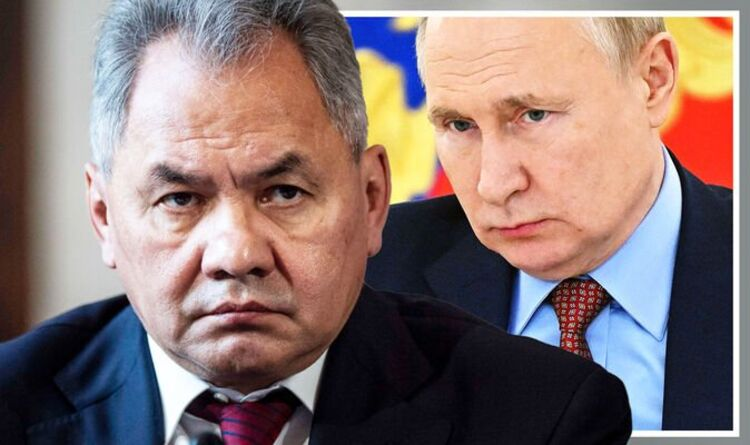


Summary:
Sergei Shoigu is understood to have suffered an attack that was caused by foul play. Reports suggest he is now in intensive care, though this has not been confirmed.Russian-Israeli businessmen Leonid Nevzlin made the claim today, on Thursday.He said Shoigu, 66, suffered a 'massive heart attack', adding this 'could not have occurred due to natural causes'.The implications of this, if true, are serious, perhaps pointing the finger to an attempted assassination at the heart of the Kremlin.Nevzlin cited sources from Moscow as the providers of his information.

2. Canadian sniper Wali: Ukraine will win the war
Link: https://www.marca.com/en/lifestyle/world-news/2022/04/10/6252f55646163ffd908b45b3.html 



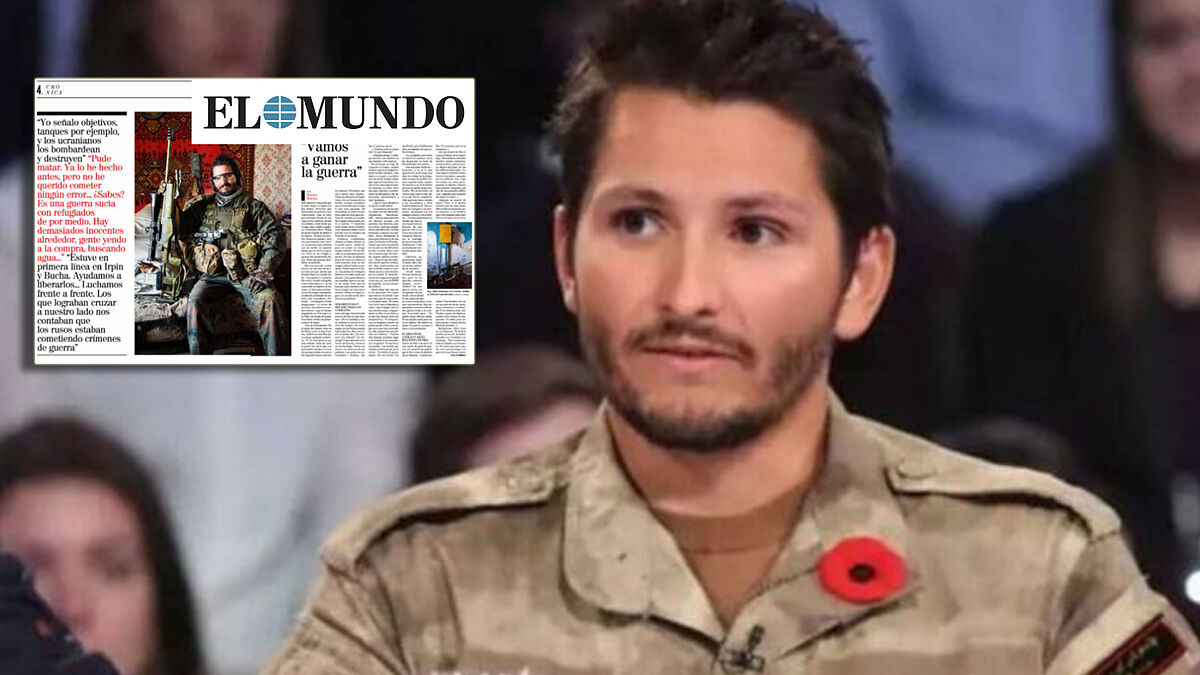


Summary:
One of the most wanted people in the Ukraine vs Russia conflictESCanadian sniper 'Wali' has become famous after joining up with the Ukrainian army to fight alongside their forces following Russia's invasion of their neighbouring country.Wali, who is computer scientist who served in the Afghan war during operations in Kandahar, is confident that Ukraine will win the war against Russia."We're going to win the war," Wali told El Mundo"I was on the front line in Irpin and Bucha. We helped liberate them, we fought face to face.

3. Letters: Historic moment should have been supported by more senators
Link: https://www.cincinnati.com/story/opinion/2022/04/09/letters-historic-moment-should-have-been-supported-more-senators/9508840002/ 


Summary:
I was heartened to see the majority of U.S. senators stand and applaud the  confirmation of a extremely qualified woman, Ketanji Brown Jackson, to the Supreme Court. A historic moment was captured on cable television Thursday but what was no

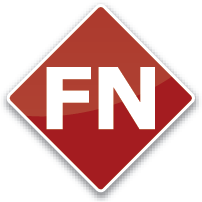


Summary:
(PLX AI) - Leifheit Q1 EBIT EUR 2.7 million, down from EUR 8.3 million a year ago. • Q1 revenue EUR 71.8 million, down from EUR 85.9 million a year ago• Says sharply rising material, freight and energy costs as well as continuing bottlenecks on the procurement markets burden earnings development• Says against the background of the Russia-Ukraine war and rising inflation, consumer restraint in the core markets is noticeable• Turnover for the full year is expected to be slightly and EBIT significantly below the previous year's figureLEIFHEIT-Aktie komplett kostenlos handeln - auf Smartbroker.

5. First 4x4s bought as part of Jeremy Clarkson-backed Ukraine fundraising push
Link: https://www.oxfordmail.co.uk/news/20072539.jeremy-clarksons-beekeepers-buy-first-4x4s-ukraine-fundraiser/ 


Summary:
Pictures: ED NIX/Lucy Zaichenko/PA The first 4x4 bought as part of a fundraising effort for Ukraine backed by Jeremy Clarkson has been delivered ahead of its journey to the war-torn count

<IPython.core.display.Image object>


Summary:
The 'hacktivist' group known as Anonymous claimed on Monday to have hacked and leaked more than 700GB of Russian government data. The hackers also claimed they breached the emails and data of Aerogas, a Russian state-backed oil and gas company. 'BREAKING: Over 700GB of Russian government data leaked. This data includes more than 200,000 emails from the Ministry of Culture of the Russian Federation,' an Anonymous-linked account Twitter account wrote. BREAKING: Over 700GB of Russian government data leaked.

7. West vs Russia: reaching point of no return
Link: https://thealtworld.com/paul_craig_roberts/west-vs-russia-reaching-point-of-no-return 



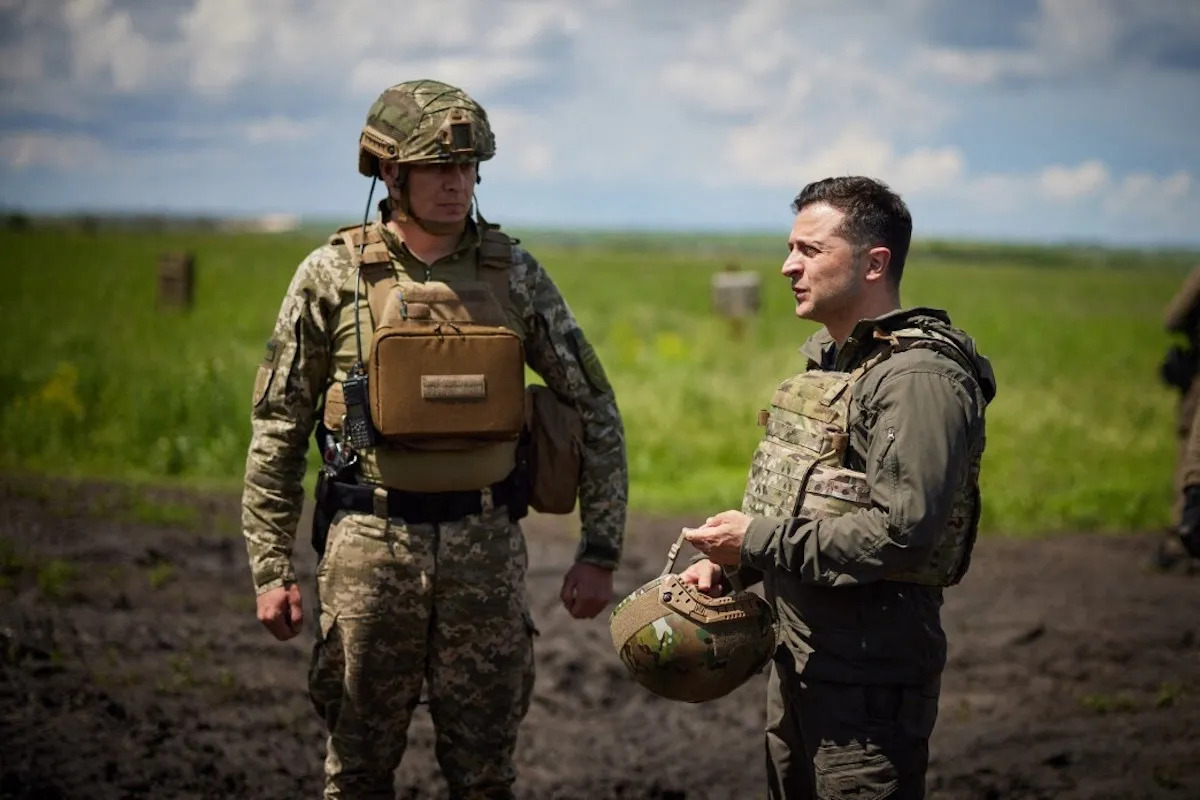


Summary:
Economist, academic, author and former Reagan administration official Paul Craig Roberts shares his viewsPaul Craig Roberts was the US assistant secretary of the Treasury for economic policy under president Ronald Reagan. He was a driver behind the economic policy of the first term of the Reagan administration and was lauded as the 'economic conscience' of the president.
After leaving the government, Roberts held the William E Simon Chair in Political Economy at the Center for Strategic and International Studies between 1983 and 1993, was a distinguished fellow at the Cato Institute between 1993 and 1996, and served on several corporate boards.



In [ ]:
# Summarized result
from IPython.display import Image

for index, row in anchors_df.iterrows():
    attributes = row['attributes']
    summary = attributes['anchors.summary']
    media = attributes['anchors.media']
    link = attributes['anchors.link']
    title = attributes['anchors.title']

    print(f"{index+1}. {title}")
    print(f"Link: {link} \n")
    try:
        display(Image(media,height=200,width=300))
    except:
        pass    
      
    print(f"\nSummary:\n{summary}")
    print()

## Algorithms For More Insights

## Centrality Algorithm
-- Can be used to determine the order in which the anchor news articles (hyper nodes) are important. This will be the order in which the news articles are shown to the reader on the website.

In [ ]:
# Centrality Algorithm implementation
# -- we are implementing a specific type called "degree centrality"
centrality_query = conn.gsql('''
  USE GRAPH Gemini
  CREATE QUERY tg_degree_cent(SET<STRING> v_type, SET<STRING> e_type, SET<STRING> re_type, BOOL in_degree = TRUE, BOOL out_degree = TRUE,
  INT top_k=100, BOOL print_accum = TRUE, STRING result_attr = "",STRING file_path = "") SYNTAX V1 {

  TYPEDEF TUPLE<VERTEX Vertex_ID, FLOAT score> Vertex_Score;
  HeapAccum<Vertex_Score>(top_k, score DESC) @@top_scores_heap;
  SumAccum<INT> @sum_degree_score;
  FILE f (file_path);

  all = {v_type};
  sll = SELECT s 
        FROM all:s
        ACCUM IF in_degree THEN
                 FOREACH edge_type in re_type DO
                     s.@sum_degree_score+=s.outdegree(edge_type)
                 END
              END,
              IF out_degree THEN
                  FOREACH edge_type in e_type DO
                      s.@sum_degree_score+=s.outdegree(edge_type)
                  END
              END;
  IF file_path != "" THEN
      f.println("Vertex_ID", "Degree");
  END;

  Start = SELECT s 
          FROM all:s
	  POST-ACCUM
	      IF result_attr != "" THEN 
                  s.setAttr(result_attr, s.@sum_degree_score) 
              END,
    
	      IF print_accum THEN 
                  @@top_scores_heap += Vertex_Score(s, s.@sum_degree_score) 
              END,
    
	      IF file_path != "" THEN 
                  f.println(s, s.@sum_degree_score) 
              END;
	      
   IF print_accum THEN
       PRINT @@top_scores_heap AS top_scores;
   END;
}
  ''')
pprint(centrality_query)


# installing queries
conn.gsql('''
  INSTALL QUERY tg_degree_cent
''')

"Using graph 'Gemini'\nSuccessfully created queries: [tg_degree_cent]."


'Start installing queries, about 1 minute ...\ntg_degree_cent query: curl -X GET \'https://127.0.0.1:9000/query/Gemini/tg_degree_cent?v_type=VALUE&e_type=VALUE&re_type=VALUE&[in_degree=VALUE]&[out_degree=VALUE]&[top_k=VALUE]&[print_accum=VALUE]&[result_attr=VALUE]&[file_path=VALUE]\'. Add -H "Authorization: Bearer TOKEN" if authentication is enabled.\nSelect \'m1\' as compile server, now connecting ...\nNode \'m1\' is prepared as compile server.\n\nQuery installation finished.'

In [ ]:
# run installed query
# Use double quotes for datatype string while using gsql
centrality_result = conn.gsql('RUN QUERY tg_degree_cent(["ANCHOR_NEWS"], ["similarity_score","is_related","country_is","topic_is","keyword_belongs_to"],["similarity_score","is_related","country_is","topic_is","keyword_belongs_to"])')

pprint(centrality_result)

"{\n\"error\": false,\n\"message\": \"\",\n\"version\": {\n\"schema\": 0,\n\"edition\": \"enterprise\",\n\"api\": \"v2\"\n},\n\"results\": [{\"top_scores\": [\n{\n\"score\": 144,\n\"Vertex_ID\": \"59671cd36eb3fd8c1a67853e55773599\"\n},\n{\n\"score\": 38,\n\"Vertex_ID\": \"b17ea3bb3c140e8c6b450c174ae606d1\"\n},\n{\n\"score\": 32,\n\"Vertex_ID\": \"fd677044b915291d7bccdbc948dcc87b\"\n},\n{\n\"score\": 22,\n\"Vertex_ID\": \"0e1632d42b5bc1a70f6692690bd2c783\"\n},\n{\n\"score\": 20,\n\"Vertex_ID\": \"68757bc307d9169c8e976a6b8bae5425\"\n},\n{\n\"score\": 12,\n\"Vertex_ID\": \"ef08f5b7f4a41b79ed3acaea1d54b1b2\"\n},\n{\n\"score\": 12,\n\"Vertex_ID\": \"9b35baf91f69980d8db3d4989c3853be\"\n}\n]}]\n}"


In [ ]:
centrality_result2 = centrality_result.replace("\n","")
print(centrality_result2)

{"error": false,"message": "","version": {"schema": 0,"edition": "enterprise","api": "v2"},"results": [{"top_scores": [{"score": 144,"Vertex_ID": "59671cd36eb3fd8c1a67853e55773599"},{"score": 38,"Vertex_ID": "b17ea3bb3c140e8c6b450c174ae606d1"},{"score": 32,"Vertex_ID": "fd677044b915291d7bccdbc948dcc87b"},{"score": 22,"Vertex_ID": "0e1632d42b5bc1a70f6692690bd2c783"},{"score": 20,"Vertex_ID": "68757bc307d9169c8e976a6b8bae5425"},{"score": 12,"Vertex_ID": "ef08f5b7f4a41b79ed3acaea1d54b1b2"},{"score": 12,"Vertex_ID": "9b35baf91f69980d8db3d4989c3853be"}]}]}


In [ ]:
centrality_result3 = json.loads(centrality_result2)
centrality_result3

{'error': False,
 'message': '',
 'results': [{'top_scores': [{'Vertex_ID': '59671cd36eb3fd8c1a67853e55773599',
     'score': 144},
    {'Vertex_ID': 'b17ea3bb3c140e8c6b450c174ae606d1', 'score': 38},
    {'Vertex_ID': 'fd677044b915291d7bccdbc948dcc87b', 'score': 32},
    {'Vertex_ID': '0e1632d42b5bc1a70f6692690bd2c783', 'score': 22},
    {'Vertex_ID': '68757bc307d9169c8e976a6b8bae5425', 'score': 20},
    {'Vertex_ID': 'ef08f5b7f4a41b79ed3acaea1d54b1b2', 'score': 12},
    {'Vertex_ID': '9b35baf91f69980d8db3d4989c3853be', 'score': 12}]}],
 'version': {'api': 'v2', 'edition': 'enterprise', 'schema': 0}}

In [ ]:
# Convert to dataframe
centrality_df = pd.DataFrame(centrality_result3['results'][0]['top_scores'])
centrality_df

,score,Vertex_ID
0,144,59671cd36eb3fd8c1a67853e55773599
1,38,b17ea3bb3c140e8c6b450c174ae606d1
2,32,fd677044b915291d7bccdbc948dcc87b
3,22,0e1632d42b5bc1a70f6692690bd2c783
4,20,68757bc307d9169c8e976a6b8bae5425
5,12,ef08f5b7f4a41b79ed3acaea1d54b1b2
6,12,9b35baf91f69980d8db3d4989c3853be


Analysis successful. Above is the order of importance of the hyper-nodes in our graph.

## Similarity Algorithm 
Earlier we had observed the take of US articles on our search term. Let us use **Similarity Algorithms** to determine which countries have an opinion similar to the US and which ones have a different one. 

In [ ]:
# similarity algorithm
# -- we are implementing a specific kind called "Cosine Similarity of Neighborhoods (All Pairs, Batch)"

similarity_query = conn.gsql('''
  USE GRAPH Gemini
  CREATE QUERY tg_cosine_nbor_ap_batch(STRING vertex_type, STRING edge_type, STRING edge_attribute, INT top_k, 
  BOOL print_accum = true, STRING file_path, STRING similarity_edge, INT num_of_batches = 1)  SYNTAX V1 {
  
  
  TYPEDEF TUPLE<VERTEX ver, FLOAT val> res_tup; # storing results in the heap
  MapAccum<VERTEX, FLOAT> @numerator_map, @@norm_map; # weight value from edge, normalized value
  HeapAccum<res_tup>(top_k, val desc) @heap; # stores topK similarity results
  FILE f (file_path);

  start = {vertex_type};
  subjects = SELECT t
             FROM start:s -(edge_type:e)- :t
             WHERE 4 > 0
             ACCUM t.@numerator_map += (s -> 4),
                   @@norm_map += (s -> pow(4, 2));

  FOREACH i IN RANGE[0, num_of_batches-1] DO
      neighbours = SELECT t
                   FROM subjects:s -(edge_type:e)- :t
                   WHERE 4 > 0
                   AND getvid(t) % num_of_batches == i
                   ACCUM
                       FOREACH (k,v) IN s.@numerator_map DO
                           CASE WHEN getvid(k) != getvid(t) THEN # for testing purposes, using !=. Use > comparison operation normally
                               t.@numerator_map += (k -> v * 4)
                           END
                       END;

    neighbours = SELECT t
                 FROM neighbours:t
                 POST-ACCUM
                     FOREACH (ver, w) IN t.@numerator_map DO
                         CASE WHEN ver != t THEN
                             FLOAT divisor = sqrt(@@norm_map.get(t) * @@norm_map.get(ver)),
                             CASE WHEN divisor == 0 THEN
                                 CONTINUE
                             END,
                             FLOAT sim = w/divisor,
                             t.@heap += res_tup(ver, sim)
                         END
                     END,
                     t.@numerator_map.clear();
  END;

  start = SELECT t
          FROM start:t
          POST-ACCUM
              FOREACH tup IN t.@heap DO
                  CASE WHEN tup.val > 0 THEN
                      IF file_path != "" THEN
                          f.println(t, tup.ver, tup.val)
                      END,
                      IF similarity_edge != "" THEN
                          INSERT INTO EDGE similarity_edge VALUES (t, tup.ver, tup.val)
                      END
                  END
              END
          ORDER BY getvid(t) ASC;

  IF print_accum THEN
      PRINT start[start.@heap];
  END;
}
  ''')
pprint(similarity_query)


# installing queries
conn.gsql('''
  INSTALL QUERY tg_cosine_nbor_ap_batch
''')


"Using graph 'Gemini'\nWarning in query tg_cosine_nbor_ap_batch (WARN-5): line 37, col 39\nThe comparison 'divisor==0' may lead to unexpected behavior because it involves\nequality test between float/double numeric values. We suggest to do such\ncomparison with an error margin, e.g. 'abs((divisor) - (0)) < epsilon', where\nepsilon is a very small positive value of your choice, such as 0.0001.\nSuccessfully created queries: [tg_cosine_nbor_ap_batch]."


'Start installing queries, about 1 minute ...\ntg_cosine_nbor_ap_batch query: curl -X GET \'https://127.0.0.1:9000/query/Gemini/tg_cosine_nbor_ap_batch?vertex_type=VALUE&edge_type=VALUE&edge_attribute=VALUE&top_k=VALUE&[print_accum=VALUE]&file_path=VALUE&similarity_edge=VALUE&[num_of_batches=VALUE]\'. Add -H "Authorization: Bearer TOKEN" if authentication is enabled.\nSelect \'m1\' as compile server, now connecting ...\nNode \'m1\' is prepared as compile server.\n\nQuery installation finished.'

In [ ]:
# run installed query
# Use double quotes for datatype string while using gsql
similarity_result = conn.gsql('RUN QUERY tg_cosine_nbor_ap_batch("COUNTRY", "country_is", "weight", 5, true, "", "", 1)')

pprint(similarity_result)

"{\n\"error\": false,\n\"message\": \"\",\n\"version\": {\n\"schema\": 0,\n\"edition\": \"enterprise\",\n\"api\": \"v2\"\n},\n\"results\": [{\"start\": [\n{\n\"v_id\": \"CN\",\n\"attributes\": {\"start.@heap\": []},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"NG\",\n\"attributes\": {\"start.@heap\": []},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"US\",\n\"attributes\": {\"start.@heap\": []},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"unknown\",\n\"attributes\": {\"start.@heap\": []},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"ES\",\n\"attributes\": {\"start.@heap\": []},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"AF\",\n\"attributes\": {\"start.@heap\": []},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"PK\",\n\"attributes\": {\"start.@heap\": []},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"MY\",\n\"attributes\": {\"start.@heap\": []},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"HK\",\n\"attributes\": {\"start.@heap\": []},\n\"v_type\": \"COUNTRY\"\n},\n{\n\"v_id\": \"GB\",\

In [ ]:
similarity_result2 = similarity_result.replace("\n","")
similarity_result3 = json.loads(similarity_result2)

In [ ]:
similarity_df = pd.DataFrame(similarity_result3['results'][0])
similarity_df.head()

,start
0,"{'v_id': 'CN', 'attributes': {'start.@heap': [..."
1,"{'v_id': 'NG', 'attributes': {'start.@heap': [..."
2,"{'v_id': 'US', 'attributes': {'start.@heap': [..."
3,"{'v_id': 'unknown', 'attributes': {'start.@hea..."
4,"{'v_id': 'ES', 'attributes': {'start.@heap': [..."


In a similar fashion, we can apply other types of algorithms like *Topological Link Prediction* and *classification* algorithms on our graph for gaining new types of knowledge.

#### Let us write some GSQL to retrieve mapping between anchor articles and their connected related_news articles. Will be useful for displaying information on the website in a structured way.

In [ ]:
# Data structures for storing required return data
anchor_vertices_list = []
anchor_to_related_news = {}

In [ ]:
# Get anchors
result_anchors = conn.runInstalledQuery("get_anchors")

# Convert to dataframe
anchors_df = pd.DataFrame(result_anchors[0]['anchors'])
anchors_df

,v_id,v_type,attributes
0,68757bc307d9169c8e976a6b8bae5425,ANCHOR_NEWS,{'anchors.link': 'https://www.express.co.uk/ne...
1,59671cd36eb3fd8c1a67853e55773599,ANCHOR_NEWS,{'anchors.link': 'https://www.marca.com/en/lif...
2,9b35baf91f69980d8db3d4989c3853be,ANCHOR_NEWS,{'anchors.link': 'https://www.cincinnati.com/s...
3,fd677044b915291d7bccdbc948dcc87b,ANCHOR_NEWS,{'anchors.link': 'https://www.finanznachrichte...
4,ef08f5b7f4a41b79ed3acaea1d54b1b2,ANCHOR_NEWS,{'anchors.link': 'https://www.oxfordmail.co.uk...
5,b17ea3bb3c140e8c6b450c174ae606d1,ANCHOR_NEWS,{'anchors.link': 'https://americanmilitarynews...
6,0e1632d42b5bc1a70f6692690bd2c783,ANCHOR_NEWS,{'anchors.link': 'https://thealtworld.com/paul...


In [ ]:
# Create and install our query
children = conn.gsql('''
  USE GRAPH Gemini
  CREATE QUERY get_children(VERTEX<ANCHOR_NEWS> news_id) FOR GRAPH Gemini SYNTAX V2{
      Start = {news_id};
      children = SELECT c FROM Start:a - () - RELATED_NEWS:c;

      PRINT children[children.id,children.link,children.media,children.rank,children.summary,children.title];
             
  }
  ''')
pprint(children)


# installing queries
conn.gsql('''
  INSTALL QUERY get_children
''')

"Using graph 'Gemini'\nSuccessfully created queries: [get_children]."


'Start installing queries, about 1 minute ...\nget_children query: curl -X GET \'https://127.0.0.1:9000/query/Gemini/get_children?news_id=VALUE\'. Add -H "Authorization: Bearer TOKEN" if authentication is enabled.\nSelect \'m1\' as compile server, now connecting ...\nNode \'m1\' is prepared as compile server.\n\nQuery installation finished.'

In [ ]:
# run installed query
result_children = conn.runInstalledQuery("get_children",params={"news_id": "0e1632d42b5bc1a70f6692690bd2c783"})
pprint(result_children)

[
  {
    "children": [
      {
        "v_id": "2c44aa2cf6b2b5b5ad50517cbca62bee",
        "v_type": "RELATED_NEWS",
        "attributes": {
          "children.id": "2c44aa2cf6b2b5b5ad50517cbca62bee",
          "children.link": "https://asiatimes.com/2022/04/west-vs-russia-reaching-point-of-no-return/",
          "children.media": "https://i0.wp.com/asiatimes.com/wp-content/uploads/2021/08/068_AA_09062021_374768.jpg?fit=1200%2C800&ssl=1",
          "children.rank": 7758,
          "children.summary": "Paul Craig Roberts was the US assistant secretary of the Treasury for economic policy under president Ronald Reagan. He was a driver behind the economic policy of the first term of the Reagan administration and was lauded as the 'economic conscience' of the president. Photo: Courtesy of Paul Craig Roberts After leaving the government, Roberts held the William E Simon Chair in Political Economy at the Center for Strategic and International Studies between 1983 and 1993, was a distinguish

In [ ]:
# Convert to dataframe
children_df = pd.DataFrame(result_children[0]['children'])
children_df

,v_id,v_type,attributes
0,2c44aa2cf6b2b5b5ad50517cbca62bee,RELATED_NEWS,{'children.id': '2c44aa2cf6b2b5b5ad50517cbca62...
1,2953ae11c48085b029c783d139b2ae5e,RELATED_NEWS,{'children.id': '2953ae11c48085b029c783d139b2a...
2,4acdc39f8035e9d0d93928c653072315,RELATED_NEWS,{'children.id': '4acdc39f8035e9d0d93928c653072...
3,a2b3fe2071d6af2a8da80c61818c011f,RELATED_NEWS,{'children.id': 'a2b3fe2071d6af2a8da80c61818c0...
4,c5e4d5f5bb79644b781932010e1d98b5,RELATED_NEWS,{'children.id': 'c5e4d5f5bb79644b781932010e1d9...


In [ ]:
children_news_info = {}

In [ ]:
# populate above created data structures
for index, row in anchors_df.iterrows():
    anchor_id = row['v_id']
    link = row['attributes']['anchors.link']
    media = row['attributes']['anchors.media']
    rank = row['attributes']['anchors.rank']
    summary = row['attributes']['anchors.summary']
    title = row['attributes']['anchors.title']

    children_ids_list = []
    children_results = conn.runInstalledQuery("get_children",params={"news_id": anchor_id})
    temp_df = pd.DataFrame(children_results[0]['children'])

    for index2,row2 in temp_df.iterrows():
        children_ids_list.append(row2['v_id'])

        c_id = row2['v_id']
        c_link = row2['attributes']['children.link']
        c_media = row2['attributes']['children.media']
        c_rank = row2['attributes']['children.rank']
        c_summary = row2['attributes']['children.summary']
        c_title = row2['attributes']['children.title']

        children_news_info[c_id] = {'link':c_link,'media':c_media,'rank':c_rank,'summary':c_summary,'title':c_title}

    anchor_vertices_list.append({'id':anchor_id,'link':link,'media':media,'rank':rank,'summary':summary,'title':title,'children':children_ids_list})

    

In [ ]:
len(anchor_vertices_list)

7

In [ ]:
children_news_info

Intended result obtained. Save and download this data. We will use this in the website.

In [ ]:
# save data
import pickle
with open('anchor_vertices_list','wb') as file:
    pickle.dump(anchor_vertices_list, file)     

with open('children_news_info','wb') as file:
    pickle.dump(children_news_info, file) 

In [ ]:
# load data
import pickle
with open('anchor_vertices_list','rb') as file:
    anchor_vertices_list2 = pickle.load(file)
print(len(anchor_vertices_list2))    

7
